# Задание 1. Первичный анализ данных c Pandas

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
data = pd.read_csv('weights_heights.csv', index_col='Index')

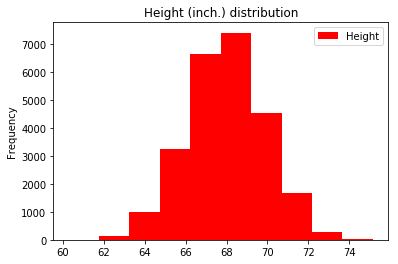

In [26]:
data.plot(y='Height', kind='hist', 
           color='red',  title='Height (inch.) distribution')

In [27]:
data.head(5)

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


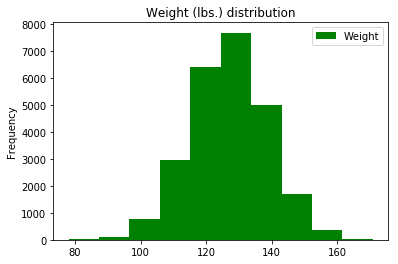

In [28]:
data.plot(y='Weight', kind='hist', 
           color='green',  title='Weight (lbs.) distribution')

In [33]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [34]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

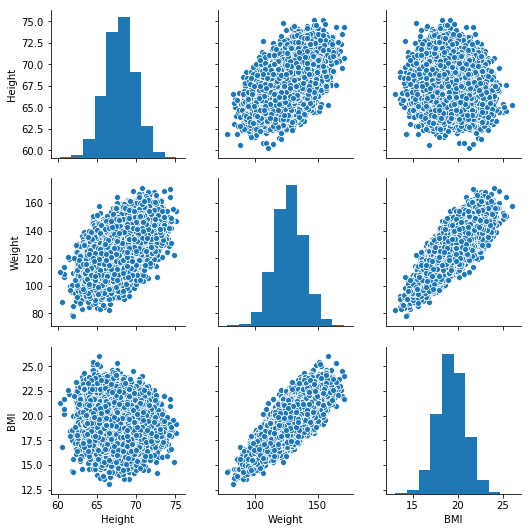

In [44]:
sns.pairplot(data);

In [138]:
def weight_category(weight):
    if weight < 120:
        return 1
    if weight >= 150:
        return 3
    else:
        return 2

data['weight_cat'] = data['Weight'].apply(weight_category)

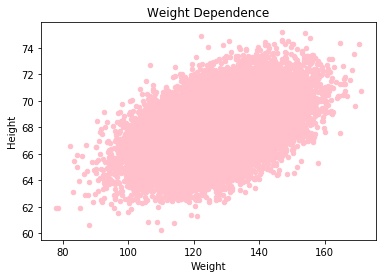

In [49]:
data.plot(x='Weight',y = 'Height', kind='scatter', 
           color='pink',  title='Weight Dependence')

# Задание 2. Минимизация квадратичной ошибки

In [158]:
def height(i):
    return data['Height'][i]

def weight(i):
    return data['Weight'][i]

def error(w0, w1):
    error = 0
    n = len(data)
    for i in range(1,n):
        error += (height(i)-(w0+w1*weight(i)))**2
    return error

In [153]:
def f(x):
    return w0+w1*x

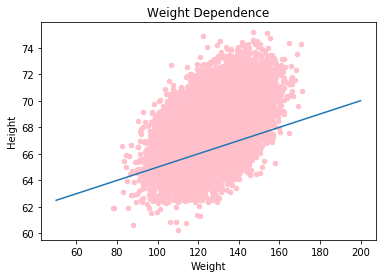

In [118]:
w0,w1 = 60, 0.05
x = np.linspace(50,200)

data.plot(x='Weight',y = 'Height', kind='scatter', 
           color='pink',  title='Weight Dependence')
plt.plot(x, f(x))

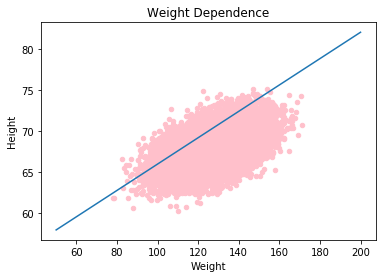

In [122]:
w0,w1 = 50, 0.16
x = np.linspace(50,200)

data.plot(x='Weight',y = 'Height', kind='scatter', 
           color='pink',  title='Weight Dependence')
plt.plot(x, f(x))

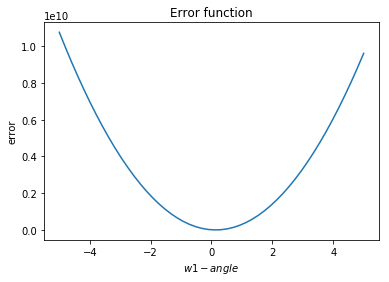

In [164]:
w0 = 50
w1 = np.linspace(-5,5)

plt.ylabel('error')
plt.xlabel('$w1-angle$')
plt.title('Error function')
plt.plot(w1,error(w0,w1))

In [165]:
from scipy.optimize import minimize_scalar

In [171]:
p = minimize_scalar(lambda w1: error(w0,w1),bounds=(-5,5))

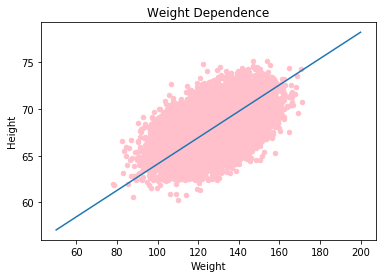

In [174]:
w1 = p.x
w0 = 50

x = np.linspace(50,200)

data.plot(x='Weight',y = 'Height', kind='scatter', 
           color='pink',  title='Weight Dependence')
plt.plot(x, f(x))

In [175]:
from mpl_toolkits.mplot3d import Axes3D

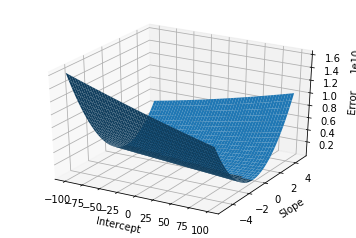

In [209]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
W0 = np.arange(-100, 100, 0.25)
W1 = np.arange(-5, 5, 0.25)
W0, W1 = np.meshgrid(W0, W1)
Z = error(W0,W1)

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(W0, W1, Z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

from scipy import optimize

#новая функция от одной переменной, ссылающаяся на функцию error двух переменных
def fun2(x):
   return error(*x)

x0=(0,0)
print optimize.minimize(fun2,x0,method='L-BFGS-B',bounds = ((-10, 10), (-5, 5)))

In [198]:
from scipy import optimize

In [199]:
#новая функция от одной переменной, ссылающаяся на функцию error двух переменных
def fun2(x):
   return error(*x)

In [203]:
x0=(0,0)
print optimize.minimize(fun2,x0,method='L-BFGS-B',bounds = (( -100, 100), (-5, 5)))

      fun: 67544.15205522635
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.02037268, -8.36735126])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 63
      nit: 12
   status: 0
  success: True
        x: array([57.57165373,  0.08200711])


In [208]:
min = [57.57165373,  0.08200711]

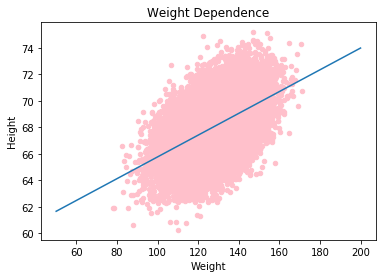

In [207]:
w0 = min[0]
w1 = min[1]

x = np.linspace(50,200)

data.plot(x='Weight',y = 'Height', kind='scatter', 
           color='pink',  title='Weight Dependence')
plt.plot(x, f(x))